#### This appears to be a section of a dataset showing information about passengers on the Titanic. Each row represents a different passenger and each column represents a different attribute of the passenger, such as their age, sex, class, and whether or not they survived the sinking of the ship.

### The columns in the dataset are as follows:

> PassengerId: a unique identifier for each passenger

> Survived: indicates whether the passenger survived (1) or not (0)

> Pclass: the passenger's class on the ship (1st, 2nd, or 3rd class)

> Name: the passenger's name

> Sex: the passenger's gender

> Age: the passenger's age

> SibSp: the number of siblings or spouses the passenger had on board

> Parch: the number of parents or children the passenger had on board

> Ticket: the passenger's ticket number

> Fare: the fare the passenger paid for their ticket

> Cabin: the cabin number of the passenger (if they had one)

> Embarked: the port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

## Import all Important Libraries

In [71]:
# import all importany libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Load data set

In [72]:
# Load data set
df = pd.read_csv('train.csv')

## Show Dataset only 5 rows

In [73]:
# Show data set
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Inforamtion of the Data Frame

In [74]:
# information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Null Values in our data

In [75]:
# null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Shape of the Data set

In [76]:
# shape of the data set
df.shape

(891, 12)

## create new column "Family" by adding "SibSp" and "Parch" columns

In [77]:
# create new column "Family" by adding "SibSp" and "Parch" columns
df["Family"] = df["SibSp"] + df["Parch"]

## Show Data set only 5 rows

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## select important column for analysis

In [79]:
# select important column for analysis
df1 = df[['Sex','Age','Fare','Family','Embarked','Pclass','Survived']]

## Show start of only 5 rows

In [80]:
df1.head()

,Sex,Age,Fare,Family,Embarked,Pclass,Survived
0,male,22.0,7.2500,1,S,3,0
1,female,38.0,71.2833,1,C,1,1
2,female,26.0,7.9250,0,S,3,1
3,female,35.0,53.1000,1,S,1,1
4,male,35.0,8.0500,0,S,3,0


## Drop null values Age Column and Emarked column

In [81]:
# Drop null values Age Column and Emarked column
df1.dropna(subset=['Age','Embarked'],inplace=True)

In [82]:
df1.isnull().sum()

Sex         0
Age         0
Fare        0
Family      0
Embarked    0
Pclass      0
Survived    0
dtype: int64

## Shape of the  Data set  New Data Frame

In [83]:
df1.shape

(712, 7)

## Describe Our Data Frame

In [84]:
df1.describe()

,Age,Fare,Family,Pclass,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.642093,34.567251,0.946629,2.240169,0.404494
std,14.492933,52.938648,1.485027,0.836854,0.491139
min,0.420000,0.000000,0.000000,1.000000,0.000000
25%,20.000000,8.050000,0.000000,1.000000,0.000000
50%,28.000000,15.645850,0.000000,2.000000,0.000000
75%,38.000000,33.000000,1.000000,3.000000,1.000000
max,80.000000,512.329200,7.000000,3.000000,1.000000


## Co-Relation in our data Frame

In [85]:
# co relation
df1.corr()

,Age,Fare,Family,Pclass,Survived
Age,1.000000,0.093143,-0.300699,-0.365902,-0.082446
Fare,0.093143,1.000000,0.206502,-0.552893,0.266100
Family,-0.300699,0.206502,1.000000,0.054467,0.045068
Pclass,-0.365902,-0.552893,0.054467,1.000000,-0.356462
Survived,-0.082446,0.266100,0.045068,-0.356462,1.000000


## Check Outlier Age & Fare Column

<AxesSubplot: xlabel='Age'>

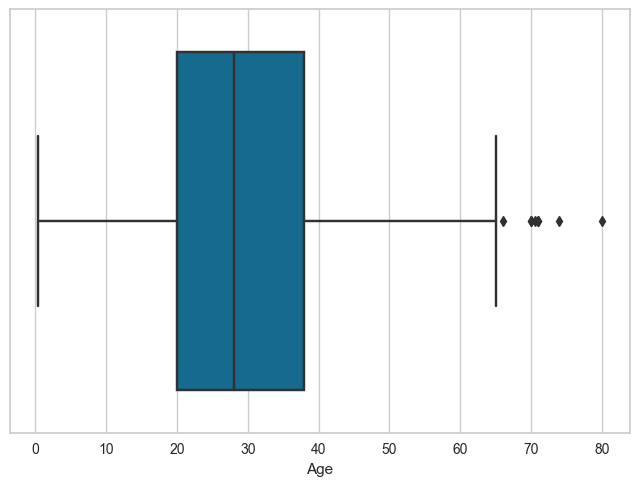

In [86]:
# Check Outlier 
sns.boxplot(x=df1['Age'])


<AxesSubplot: xlabel='Fare'>

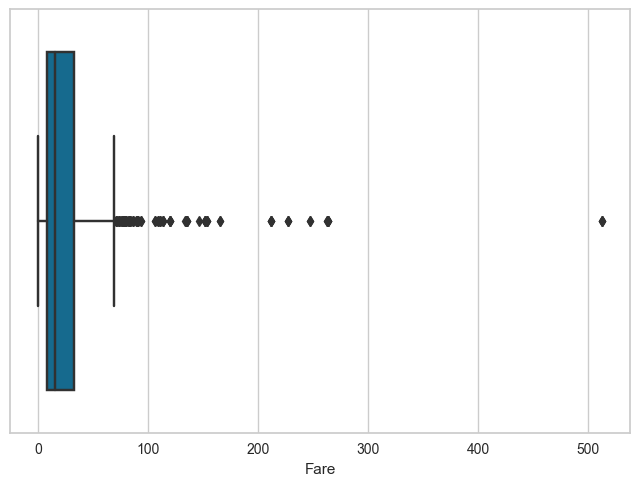

In [87]:
sns.boxplot(x=df1['Fare'])

## Removed Outlier Age & Fare Column

In [88]:
# removed Outlier
df1 = df1[df1['Age']<60]

In [89]:
# removed Outlier
df1 = df1[df1['Fare']<300]

# Data Visualization

In [90]:
# box plot Age and Fare column using plotly
import plotly.express as px
fig = px.box(df1, y=["Age",'Fare'])
fig.show()


> In this Graph we will show Age column haven't outlier but Fare column have some outlier

In [91]:
import plotly.express as px
df = df1
fig = px.pie(df, values='Age', names='Sex', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title='Distribution of Age by Sex')
fig.show()


> In this Graph we will show % of Male is higer Age

In [92]:
import plotly.express as px
df = df1
fig = px.pie(df, values='Fare', names='Sex', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title='Distribution of Fare by Sex')
fig.show()

In [93]:
import plotly.express as px
df = df1
fig = px.pie(df, values='Survived', names='Sex', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

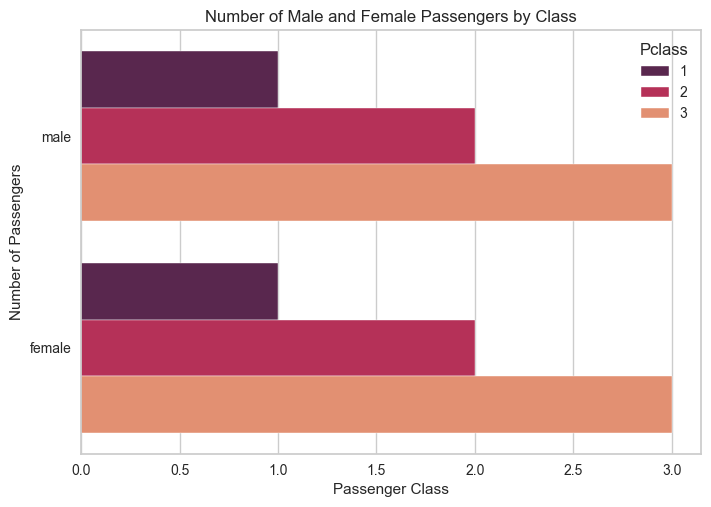

In [94]:
import seaborn as sns

sns.set_style("whitegrid")
sns.color_palette("dark")
sns.barplot(x="Pclass", y="Sex", hue="Pclass", data=df, palette=sns.color_palette("rocket", n_colors=3))
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Male and Female Passengers by Class')
plt.show()



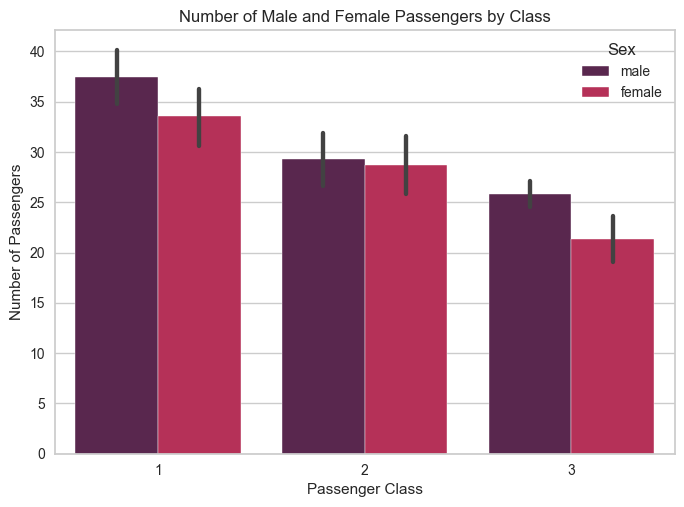

In [95]:
sns.set_style("whitegrid")
sns.color_palette("dark")
sns.barplot(x="Pclass", y="Age", hue="Sex", data=df, palette=sns.color_palette("rocket", n_colors=3))
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Male and Female Passengers by Class')
plt.show()

In [96]:
import plotly.express as px
df = df1
fig = px.scatter(df, x="Age", y="Fare", color="Embarked", facet_col="Sex", facet_row="Pclass")
fig.show()

In [97]:
import plotly.express as px

df = df1[['Age', 'Sex', 'Family']].head(10) # select first 10 rows of these columns
fig = px.bar(df, y='Family', x='Age', color='Sex', text='Family',
             title="Bar chart for Age, Sex, and Family")
fig.show()


In [98]:
import plotly.express as px

df = df1[['Age', 'Sex', 'Family', 'Survived']].head(10) # select first 10 rows of these columns
fig = px.bar(df, y='Family', x='Sex', color='Survived', text='Family',
             title="Bar chart for Age, Survived, and Family")
fig.show()


# Machine Learning

In [99]:
df1.head()

,Sex,Age,Fare,Family,Embarked,Pclass,Survived
0,male,22.0,7.2500,1,S,3,0
1,female,38.0,71.2833,1,C,1,1
2,female,26.0,7.9250,0,S,3,1
3,female,35.0,53.1000,1,S,1,1
4,male,35.0,8.0500,0,S,3,0


In [100]:
# Save data frame
df1.to_csv('titanic.csv',index=False)

In [101]:
from pycaret.classification import *
exp = ClassificationExperiment()

In [102]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [103]:
exp.setup(data=df1, target="Survived", session_id=123)

In [104]:
exp.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:33:27
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [105]:
# setup(data=df1, target="Survived", normalize=True, normalize_method="zscore", session_id=123)
# cm = compare_models()

In [106]:
# setup(data=df1, target="Survived", feature_selection=True, feature_selection_method="classic", session_id=123)

# cm = compare_models()

In [107]:
# setup(data=df1, target="Survived", remove_outliers=True, outliers_threshold=0.05,session_id=123)

# cm = compare_models()

In [108]:
# setup(data=df1, target="Survived", transformation=True, text_features_method="yeo-johnson", session_id=123)

# cm = compare_models()

In [109]:
# setup(data=df1, target="Survived", remove_outliers=True, outliers_threshold=0.05, normalize=True, normalize_method="zscore", transformation=True, transformation_method="yeo-johnson", session_id=123)

# cm = compare_models()

In [110]:
# setup(data=df1, target="Survived", pca=True, pca_method="linear", session_id=123)

# cm = compare_models()

In [111]:
setup(data=df1, target="Survived", remove_outliers=True, outliers_threshold=0.05, normalize=True, normalize_method="zscore", transformation=True, transformation_method="yeo-johnson", session_id=123)

best = compare_models()

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(684, 7)"
4,Transformed data shape,"(660, 9)"
5,Transformed train set shape,"(454, 9)"
6,Transformed test set shape,"(206, 9)"
7,Ordinal features,1
8,Numeric features,4
9,Categorical features,2


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:34:29
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8305,0.8795,0.7589,0.8169,0.7805,0.6438,0.6514,0.2670
catboost,CatBoost Classifier,0.8222,0.8814,0.7287,0.8188,0.7640,0.6237,0.6326,0.2650
gbc,Gradient Boosting Classifier,0.8139,0.8816,0.7284,0.8082,0.7570,0.6083,0.6190,0.2570
xgboost,Extreme Gradient Boosting,0.8033,0.8785,0.7379,0.7771,0.7502,0.5891,0.5960,0.2700
knn,K Neighbors Classifier,0.7992,0.8502,0.7082,0.7894,0.7366,0.5768,0.5875,0.2460
ada,Ada Boost Classifier,0.7951,0.8312,0.7589,0.7435,0.7478,0.5755,0.5798,0.2630
rf,Random Forest Classifier,0.7930,0.8673,0.7232,0.7622,0.7362,0.5668,0.5736,0.2590
lr,Logistic Regression,0.7887,0.8512,0.7384,0.7408,0.7368,0.5607,0.5639,0.2490
ridge,Ridge Classifier,0.7887,0.0000,0.7439,0.7400,0.7398,0.5622,0.5648,0.2440
lda,Linear Discriminant Analysis,0.7887,0.8534,0.7439,0.7400,0.7398,0.5622,0.5648,0.3020


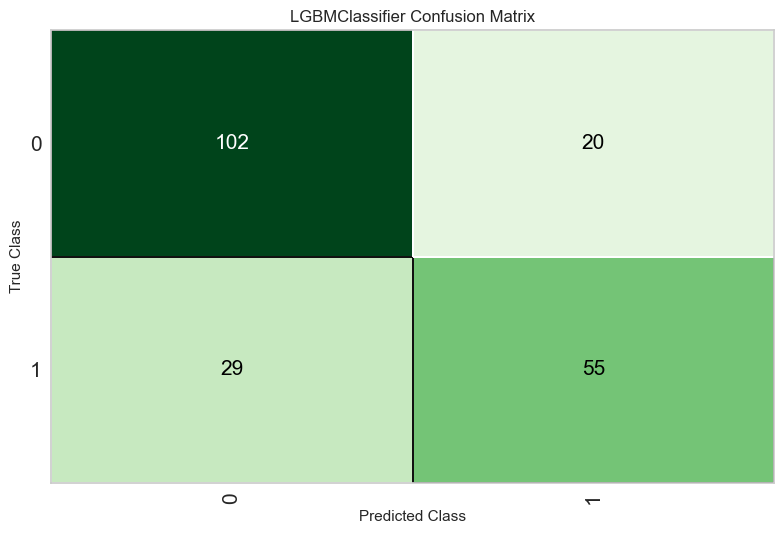

In [112]:
plot_model(best, plot='confusion_matrix')

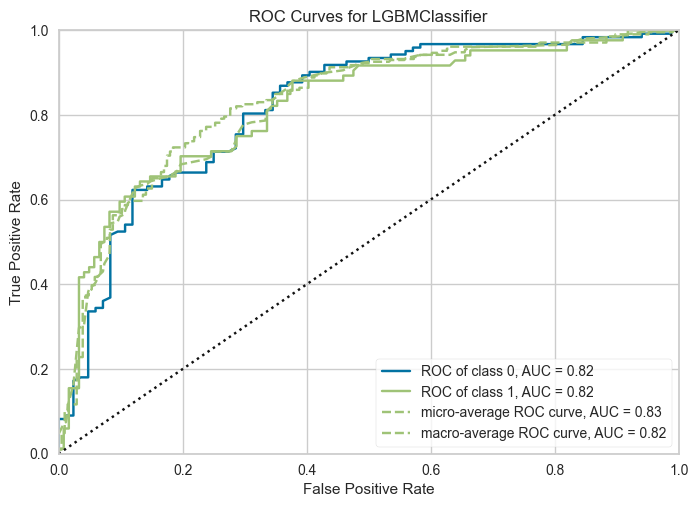

In [113]:
plot_model(best, plot='auc')

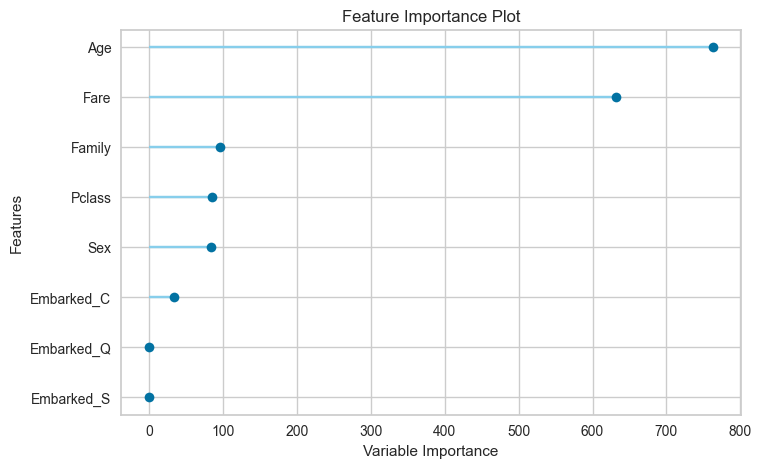

In [114]:
plot_model(best, plot='feature')

In [115]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7621,0.8197,0.6548,0.7333,0.6918,0.4992,0.5013


## Prediction

In [116]:
holdout_pred.head(20)

,Sex,Age,Fare,Family,Embarked,Pclass,Survived,prediction_label,prediction_score
163,male,17.0,8.662500,0,S,3,0,0,0.9110
7,male,2.0,21.075001,4,S,3,0,0,0.7784
167,female,45.0,27.900000,5,S,3,0,0,0.8842
777,female,5.0,12.475000,0,S,3,1,1,0.6654
603,male,44.0,8.050000,0,S,3,0,0,0.7006
720,female,6.0,33.000000,1,S,2,1,1,0.9969
380,female,42.0,227.524994,0,C,1,1,1,0.9790
73,male,26.0,14.454200,1,C,3,0,0,0.9577
889,male,26.0,30.000000,0,C,1,1,0,0.6460
798,male,30.0,7.229200,0,C,3,0,0,0.9238


## Load Unseen Data Set for Prediction

In [130]:
df2 = pd.read_csv("test.csv", index_col="PassengerId")

In [131]:
df2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
df2["Family"] = df2["SibSp"] + df2["Parch"]

In [133]:
df2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [134]:
df2=df2[["Sex","Age","Fare","Family","Embarked","Pclass"]]

In [135]:
df2.head()

,Sex,Age,Fare,Family,Embarked,Pclass
PassengerId,,,,,,
892,male,34.5,7.8292,0,Q,3
893,female,47.0,7.0000,1,S,3
894,male,62.0,9.6875,0,Q,2
895,male,27.0,8.6625,0,S,3
896,female,22.0,12.2875,2,S,3


In [136]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       332 non-null    float64
 2   Fare      417 non-null    float64
 3   Family    418 non-null    int64  
 4   Embarked  418 non-null    object 
 5   Pclass    418 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 22.9+ KB


In [137]:
df2.isnull().sum()

Sex          0
Age         86
Fare         1
Family       0
Embarked     0
Pclass       0
dtype: int64

In [138]:
df2.dropna(subset=['Age','Fare'],inplace=True)

## prediction Unseen data set

In [139]:
new_pre = predict_model(best, data=df2)
new_pre

,Sex,Age,Fare,Family,Embarked,Pclass,prediction_label,prediction_score
PassengerId,,,,,,,,
892,male,34.5,7.829200,0,Q,3,0,0.9960
893,female,47.0,7.000000,1,S,3,0,0.8824
894,male,62.0,9.687500,0,Q,2,0,0.9474
895,male,27.0,8.662500,0,S,3,1,0.6049
896,female,22.0,12.287500,2,S,3,0,0.8824
...,...,...,...,...,...,...,...,...
1301,female,3.0,13.775000,2,S,3,1,0.8407
1303,female,37.0,90.000000,1,Q,1,1,0.9869
1304,female,28.0,7.775000,0,S,3,0,0.6897


In [140]:
# Save prediction file new data Frame
new_pre.to_csv('predictions.csv', index=False)


In [153]:
output = pd.DataFrame({"Survived": new_pre["prediction_label"]}, index=new_pre.index)
output.to_csv("finally.csv", index=True)

